![NERC Logo](files/nerc.jpg)

# DTP Summer School 2018: Programming Session, Thu 12th July

This is a jupyter notebook to illustrate scientific computing within the NERC DTP. A wide range of languages, tools, and computing resources are used by DTP students during their reasearch, but this session will demonstrate the following key concepts:

* Cloud computing with Jupyter Notebooks.
* Basic programming with Python.
* Analysis of climate data.
* Visualation of results.

You will not need any prior experience of Python, or any other of the tools used here. You simply need to run the notebook in a web browser. 

## Jupyter Notebook Basics

Jupyter Notebooks = Python + Interactivity

Jupyter notebooks are a great tool for presenting some python code, as well as the subsequent results from running the code. On top of that, you can easily go back and make changes to the code, re-run the notebook, and see how the output changes.

Notebooks are made up of cells, which contains either text or code. You can execute all cells at once, or one at a time. Here we will go with the latter, and do one cell at a time. 

The command for executing a single cell is:

SHIFT+ENTER

Executing a cell with text (and not code) will do nothing and will simply move onto the next cell. Below is a cell with a single line of python, which will print some text; have a go a executing the cell with SHIFT+ENTER.


In [64]:
print "----------------------------------------------------------\n"
print "You've just run some python code on the cloud! \n"
print "The output is displayed below the code.\n"
print "The output can be text, images, or visualisations of data.\n"
print "----------------------------------------------------------\n"
print "Run by: BLAH BLAH BLAH"

----------------------------------------------------------

You've just run some python code on the cloud! 

The output is displayed below the code.

The output can be text, images, or visualisations of data.

----------------------------------------------------------

Run by: BLAH BLAH BLAH


When we move on to executing more complicated cells, it may take a while for anything to happen. Do not fret - the python code can sometimes take a moment or two to execute in the cloud. When in doubt, look for the little circle in the top right corner next to 'Python 2': if it's empty, the computation is finished, whereas if it is a filled dark circle, then the cell is still being executed. 

You can go back and edit the code within cells. Try this out by clicking on the cell above with the python code in it (the one with the print statements), and changing BLAH BLAH BLAH to your name in the last night. Re-run the cell with SHIFT+ENTER.

## Quick Introduction to Python

Python is a popular and versatile programming language. It is generally regarded as quite a 'nice' language to learn (compared to other languages such as C++), but has powerful packages available, particularly in data wrangling (Pandas), data visualisation (Matplotlib), handling numerical data (Numpy), and machine learning (Keras, Tensorflow).

Let us begin by defining some variables and playing around with them.

In [65]:
# defining two variables 'a' and 'b', and assigning them values 7 and 4 respectively
a = 7.0
b = 4.0

# multiply them together
a*b

28.0

In [66]:
# divide a by b
a / b

1.75

In [67]:
# remainder after dividing a by b
a % b

3.0


Once you start defining variables, you can write more complex functions to act on them. One of the most common lines of python code is the trusty 'for' loop. The structure of a for loop in python is the following:

for X in Y :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DO SOMETHING WITH X
    
The space before 'DO SOMETHING WITH X' is crucial. Space in tells python what code should be executed within the for loop. Consider the following for loop

for X in Y: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DO TASK 1

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DO TASK 2
    
DO TASK 3

The first two tasks with spaces before them (also known as indentation), will be carried out within the for loop. Whereas the line 'DO TASK 3' does not have the same indentation, so will not be carried out within the for loop. Note that all lines within a for loop *must* have the same indentation, otherwise you'll get an error. This white space/indentation rule also applies to other statements such as 'while' and 'if'.

We will now use a for loop to print out all the integers up to 20.

In [68]:
# looping through all integers from 0 to 20
for n in range(21) :
    print n

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Ta da! Here we have used the 'range' function, which produces a list of integers (not including the final number). The 'range' function is called the iterable (the thing we're looping over), but we can loop over other iterables as well. For example, we can write a list of animal names and loop through them all.

In [69]:
# write a list of names
myList = [  'cat', 'dog', 'rabbit', 'red panda', 'naked mole rat' ]

for animal in myList :
    print animal

cat
dog
rabbit
red panda
naked mole rat


In the above cell, we wrote a string for each animal name. Python views strings as simply a list of letters, so we can loop over those too.

In [70]:
myString = 'naked mole rat'

for letter in myString :
    print letter

n
a
k
e
d
 
m
o
l
e
 
r
a
t


You can combine two strings by simply using the + symbol, shown below.

In [71]:
for n in range(21) :
    
    string1 = 'The current number is '
    string2 = str(n)
    
    string3 = string1 + string2
    
    print string3

The current number is 0
The current number is 1
The current number is 2
The current number is 3
The current number is 4
The current number is 5
The current number is 6
The current number is 7
The current number is 8
The current number is 9
The current number is 10
The current number is 11
The current number is 12
The current number is 13
The current number is 14
The current number is 15
The current number is 16
The current number is 17
The current number is 18
The current number is 19
The current number is 20


## Analysing Climate Data

We're now going to load in some climate data and do a bit of analysis. Don't worry if you don't understand every function/line of code; the main aim is to show some of the things you can do with python. 

![ECMWF Logo](files/ecmwf.svg)

The data we're going to use is surface air temperature from the ERA-Interim Reanalysis product from ECMWF. 'Reanalysis' means that the dataset is a combination of observations and model output. The ERA-Interim dataset is a respected source of data and is regarded as one of the most accurate representations of previous weather and climate. The data is monthly averages of global surface air temperature, from 1979 to 2017.

### Loading in the data

Let's load in the data from a netcdf (.nc) file.

In [72]:
# import all the packages we need
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf

# read data from the .nc file located in the folder called 'data'
dataFile  = netcdf.NetCDFFile('data/atlantic_monthly_surface_temp.nc','r')

temperature = dataFile.variables['2T_GDS4_SFC_S123'] # load temperature data

# convert to array and flip y dimension
temperature = np.flip( temperature[:]*1, axis=1 )

# convert from Kevlin to Celcius
temperature = temperature - 273.15

# the above arrays have three dimensions: (time,x,y)
print "Temperature data dimensions: ( months, lon, lat ) = ", temperature.shape, "\n"
print "Number of months of data: ", temperature.shape[0]
print "Number of points in x direction: ", temperature.shape[2]
print "Number of points in y directions: ", temperature.shape[1]


Temperature data dimensions: ( months, lon, lat ) =  (468, 83, 168) 

Number of months of data:  468
Number of points in x direction:  168
Number of points in y directions:  83


### Visualisation: Time-Mean Surface Temperature

We're now going to average the surface temperature values in time, and then plot the resulting spatial map.

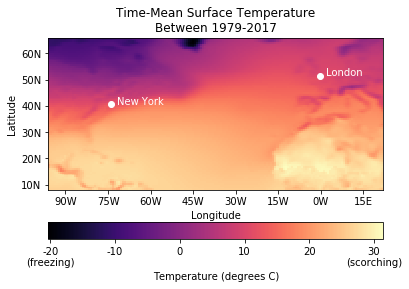

In [73]:
# calculate the time-mean using numpy
tempTimeMean = np.mean( temperature, axis=0 )

longitude = np.linspace(-96,22,168)
latitude = np.linspace(8,66,83)

# plot the time-mean using matplotlib
plt.pcolor( longitude, latitude, tempTimeMean, cmap='magma' )

plt.title('Time-Mean Surface Temperature\nBetween 1979-2017')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks( range(-90,30,15), ['90W','75W','60W','45W','30W','15W','0W','15E'])
plt.yticks( range(10,70,10), ['10N','20N','30N','40N','50N','60N'])

# annotate London and New York
x0, y0 = -0.127, 51.5  
x1, y1 = -74.0, 40.7
plt.plot( x0, y0, 'ow' )
plt.plot( x1, y1, 'ow')
plt.text( x0+2, y0, 'London', color='white' )
plt.text( x1+2, y1, 'New York', color='white')

# add a colorbar
cBar = plt.colorbar( orientation='horizontal', label='Temperature (degrees C)' )
labels = cBar.ax.set_xticklabels( ['-20\n(freezing)','-10', '0', '10', '20', '30\n(scorching)'])


The above plot is the time-mean surface temperature for a region over the North Atlantic ocean. You can just about make out the outline of the continents, including the UK in the top-right corner. Note that although the UK sits at a similar latitude to Canada, the UK is significantly warmer - this is primarily due to the Gulf Stream.

### Visualation: Temperature Time Series

We've plotted the *average* temperature, but we now want to look at how the temperature varies in time. We're going to plot the surface air temperature for the two cities labelled above: New York and London.

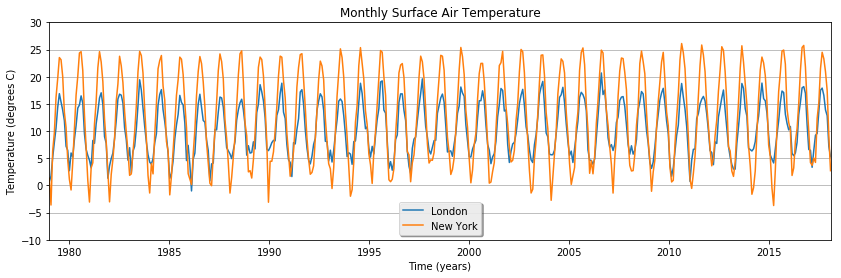

In [74]:
# define vector of time values
years = np.linspace(1979,2018+1.0/12,468)

# extract temperature data for our two cities
# (closest grid point to London)
lon0 = ( np.abs( longitude - x0 ) ).argmin()
lat0 = ( np.abs( latitude - y0 ) ).argmin()

# (closest grid point to New York)
lon1 = ( np.abs( longitude - x1 ) ).argmin()
lat1 = ( np.abs( latitude - y1 ) ).argmin()

tempLondon = temperature[:,lat0,lon0]
tempNewYork = temperature[:,lat1,lon1]

# plot the time series
plt.figure( figsize=(14, 4))
plt.plot( years, tempLondon, label='London')
plt.plot( years, tempNewYork, label='New York')

# tidy up figure
plt.title('Monthly Surface Air Temperature')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (degrees C)')
plt.xlim( (years[0],years[-1]) )
plt.ylim( (-10,30))
ax = plt.gca()
ax.yaxis.grid()
hLeg = plt.legend( shadow=True )


Interestingly, both London and New York have similar mean temperatures, but New York has larger extremes: the summers are hotter, and the winters colder. As we are plotting monthly data, there is a strong seasonal cycle in the temperature data - let's remove this seasonal cycle now.

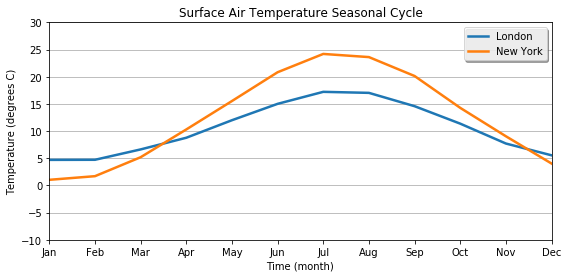

In [75]:
# calculate the average temperature for each month
seasCycleLondon = np.zeros( (12,) )
seasCycleNewYork = np.zeros( (12,) )

# loop through each value in the time series, and store
# the temperature value for that month
for t in range(468) :
    
    seasCycleLondon[ t % 12 ] += tempLondon[t]
    seasCycleNewYork[ t % 12 ] += tempNewYork[t]
    
# divide the temperature by 39 years to get the average
seasCycleLondon /= 39
seasCycleNewYork /= 39

# plot the seasonal cycles
plt.figure( figsize=(9, 4))
plt.plot( range(12), seasCycleLondon, label='London', lw=2.5)
plt.plot( range(12), seasCycleNewYork, label='New York', lw=2.5 )

# tidy up figure
plt.title('Surface Air Temperature Seasonal Cycle')
plt.xlabel('Time (month)')
plt.ylabel('Temperature (degrees C)')
plt.xlim( (0,11) )
plt.ylim( (-10,30))
plt.xticks( range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax = plt.gca()
ax.yaxis.grid()
hLeg = plt.legend( shadow=True )


This confirms our observation: New York (the orange curve) has larger temperature extremes compared to London. We will now remove this seasonal cycle from our two time series.

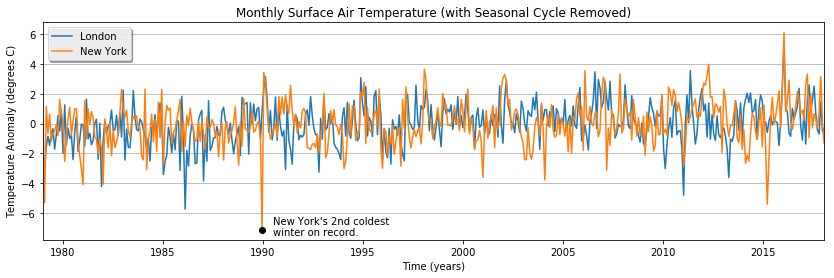

In [76]:
# remove the seasonal cycle from our original temperature
# time series for New York and London
tempLondonB = tempLondon - np.tile( seasCycleLondon, 39 )
tempNewYorkB = tempNewYork - np.tile( seasCycleNewYork, 39 )

# plot the time series
plt.figure( figsize=(14, 4))
plt.plot( years, tempLondonB, label='London')
plt.plot( years, tempNewYorkB, label='New York')

# tidy up figure
plt.title('Monthly Surface Air Temperature (with Seasonal Cycle Removed)')
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomaly (degrees C)')
plt.xlim( (years[0],years[-1]) )
ax = plt.gca()
ax.yaxis.grid()
hLeg = plt.legend( shadow=True )

# annotate
plt.text( 1990.5, -7.5, "New York's 2nd coldest\nwinter on record.")
plt.plot( 1989.95, -7.1, 'ko' )


We can now more easily see any deviations from the climatology. In particular, we can see a particularly cold winter for New York at 1990, which turns out to be the 2nd coldest winter on record, with an average December temperature of nearly -8C.

Are temperatures rising in these two cities? The monthly anomalies make it difficult to dicern any long term trend in the data. There are numerous ways of extracting a long term trend, but here we're simply going to temporal smooth the data over a certain length window; this will remove the monthly fluctuations.

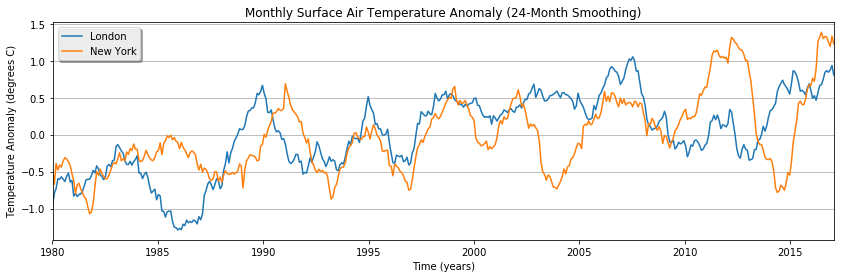

In [77]:
# smoothing window size (in months)
win = 24

# make new vectors for the smoothed time series
tempLondonC = np.zeros( (468-win,) )
tempNewYorkC = np.zeros( (468-win,) )

# loop through each point in time, and average 
# over a window
for t in range(468-win) :
    
    tempLondonC[t] = np.mean( tempLondonB[t:t+win])
    tempNewYorkC[t] = np.mean( tempNewYorkB[t:t+win] )
    
yearsNew = years[win/2:-win/2]

# plot the smoothed time-series
# plot the time series
plt.figure( figsize=(14, 4))
plt.plot( yearsNew, tempLondonC, label='London')
plt.plot( yearsNew, tempNewYorkC, label='New York')

# tidy up figure
plt.title('Monthly Surface Air Temperature Anomaly ('+str(win)+'-Month Smoothing)')
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomaly (degrees C)')
plt.xlim( (yearsNew[0],yearsNew[-1]) )
ax = plt.gca()
ax.yaxis.grid()
hLeg = plt.legend( shadow=True )


We're starting to see a positive trend! I wonder what's causing temperatures to rise...

(Optional: try changing the variable called 'win', the width of the smoothing window, to different values such as 12, 48, 96 months, and then re-run the cell. See how the various values change the above time series. Does the long-term trend become more or less apparent?)